In [70]:
import pandas as pd
import numpy as np

In [88]:
data = pd.read_csv('predicted_data.csv')

In [89]:
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)
data.set_index(['GAME_DATE', 'HOME', 'AWAY'])


,,,Results,Odds1,Odds2,Score,prediction
GAME_DATE,HOME,AWAY,,,,,
11/03/2017,LAC,PHI,1,1.06,11.06,112:100,0.808359
10/12/2015,CHI,LAC,1,2.03,1.84,83:80,0.432308
18/02/2010,CLE,DEN,0,1.33,3.44,116:118,0.863924
10/02/2011,BOS,LAL,0,1.74,2.14,86:92,0.547415
23/03/2012,ATL,BKN,1,1.31,3.58,93:84,0.643577
...,...,...,...,...,...,...,...
20/02/2012,UTA,SAS,0,2.19,1.71,102:106,0.384152
01/03/2018,SAC,BKN,1,2.19,1.72,116:111,0.491052
11/01/2013,NYK,CHI,0,1.55,2.54,101:108,0.683397


In [90]:
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')
data['odds_total'] = data['odds1_true'] + data['odds2_true']
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')
data.rename(columns={'prediction': 'pred_home'}, inplace=True)
data

,Results,GAME_DATE,HOME,AWAY,Odds1,Odds2,Score,pred_home,odds1_true,odds2_true,odds_total,pred_away
0,1,11/03/2017,LAC,PHI,1.06,11.06,112:100,0.808359,0.943396,0.090416,1.033812,0.191641
1,1,10/12/2015,CHI,LAC,2.03,1.84,83:80,0.432308,0.492611,0.543478,1.036089,0.567692
2,0,18/02/2010,CLE,DEN,1.33,3.44,116:118,0.863924,0.751880,0.290698,1.042577,0.136076
3,0,10/02/2011,BOS,LAL,1.74,2.14,86:92,0.547415,0.574713,0.467290,1.042002,0.452585
4,1,23/03/2012,ATL,BKN,1.31,3.58,93:84,0.643577,0.763359,0.279330,1.042688,0.356423
...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0,20/02/2012,UTA,SAS,2.19,1.71,102:106,0.384152,0.456621,0.584795,1.041416,0.615848
2847,1,01/03/2018,SAC,BKN,2.19,1.72,116:111,0.491052,0.456621,0.581395,1.038016,0.508948
2848,0,11/01/2013,NYK,CHI,1.55,2.54,101:108,0.683397,0.645161,0.393701,1.038862,0.316603
2849,1,02/04/2014,SAC,LAL,1.28,3.94,107:102,0.674776,0.781250,0.253807,1.035057,0.325224


In [91]:
cols = list(data.columns.values)
cols

['Results',
 'GAME_DATE',
 'HOME',
 'AWAY',
 'Odds1',
 'Odds2',
 'Score',
 'pred_home',
 'odds1_true',
 'odds2_true',
 'odds_total',
 'pred_away']

In [92]:
data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]
data.set_index(['GAME_DATE', 'HOME', 'AWAY'], inplace=True)
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
GAME_DATE,HOME,AWAY,,,,,,,,,
11/03/2017,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.808359,0.191641,1
10/12/2015,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.432308,0.567692,1
18/02/2010,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.863924,0.136076,0
10/02/2011,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.547415,0.452585,0
23/03/2012,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.643577,0.356423,1
...,...,...,...,...,...,...,...,...,...,...,...
20/02/2012,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.384152,0.615848,0
01/03/2018,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.491052,0.508948,1
11/01/2013,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.683397,0.316603,0


In [93]:
percentile = [0.6, 0.7,0.8, 0.9]
for i in percentile:
    print(data.pred_home.quantile(i))

    #print(data.pred_away.quantile(i))

0.6658161878585815
0.7255365252494812
0.790120005607605
0.8496930599212646


array([[<AxesSubplot:title={'center':'pred_away'}>]], dtype=object)

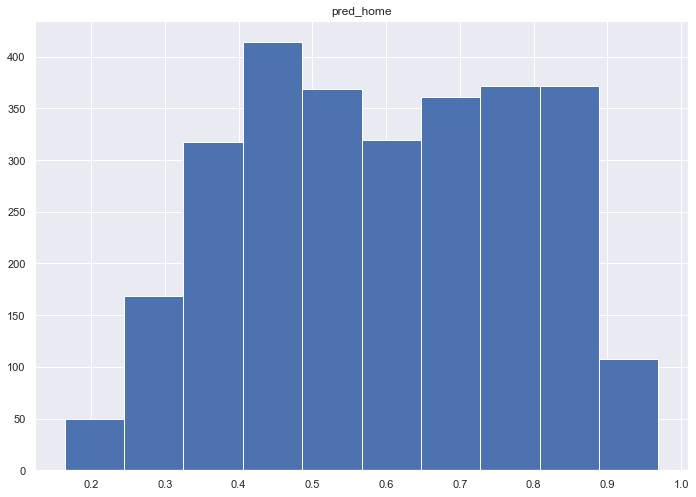

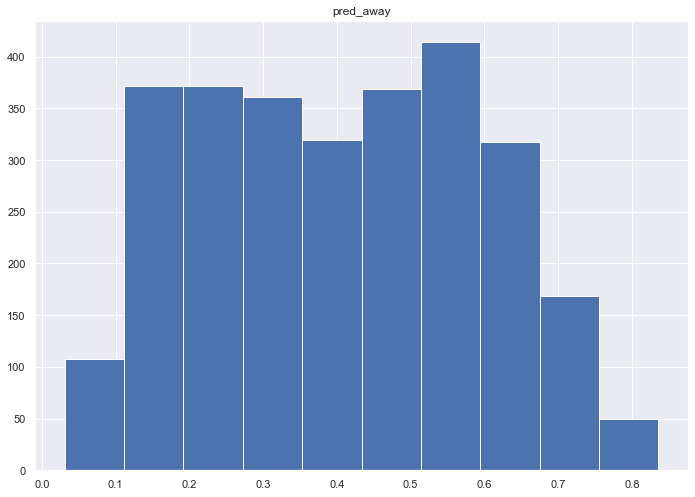

In [94]:
data.hist(column='pred_home')
data.hist(column='pred_away')

In [95]:
#data['pred_home_t'] = np.where(data['pred_home']> 0.5, data['pred_home'], 0.0)
#data['pred_away_t'] = np.where(data['pred_away']> 0.5, data['pred_away'], 0.0)


In [96]:
data[['odds1_true', 'odds2_true']].astype(float)
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02

<ipython-input-96-69b6b93bf76c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
<ipython-input-96-69b6b93bf76c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02


In [97]:
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results,odds1_true_02,odds2_true_02
GAME_DATE,HOME,AWAY,,,,,,,,,,,
11/03/2017,LAC,PHI,112:100,1.06,11.06,1.033812,0.943396,0.090416,0.808359,0.191641,1,0.963396,0.110416
10/12/2015,CHI,LAC,83:80,2.03,1.84,1.036089,0.492611,0.543478,0.432308,0.567692,1,0.512611,0.563478
18/02/2010,CLE,DEN,116:118,1.33,3.44,1.042577,0.751880,0.290698,0.863924,0.136076,0,0.771880,0.310698
10/02/2011,BOS,LAL,86:92,1.74,2.14,1.042002,0.574713,0.467290,0.547415,0.452585,0,0.594713,0.487290
23/03/2012,ATL,BKN,93:84,1.31,3.58,1.042688,0.763359,0.279330,0.643577,0.356423,1,0.783359,0.299330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20/02/2012,UTA,SAS,102:106,2.19,1.71,1.041416,0.456621,0.584795,0.384152,0.615848,0,0.476621,0.604795
01/03/2018,SAC,BKN,116:111,2.19,1.72,1.038016,0.456621,0.581395,0.491052,0.508948,1,0.476621,0.601395
11/01/2013,NYK,CHI,101:108,1.55,2.54,1.038862,0.645161,0.393701,0.683397,0.316603,0,0.665161,0.413701


In [98]:
def roi1h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.5 and df['pred_home'] <0.6:
            return df['Results'] * df['Odds1'] * 1 -1
def roi2h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.6 and df['pred_home'] <=0.7:
            return df['Results'] * df['Odds1'] * 2 - 2
def roi3h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.7:
            return df['Results'] * df['Odds1'] * 3 -3
def roi1a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']>= 0.5 and df['pred_away'] <0.6:
            return (1- df['Results']) * df['Odds2'] * 1 -1
def roi2a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.6 and df['pred_away'] <=0.7:
            return (1 - df['Results']) * df['Odds2'] * 2 -2
def roi3a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.7:
            return (1 - df['Results']) * df['Odds2'] * 3 -3
data = data.sort_values(by='GAME_DATE')
data['roi1h'] = data.apply(roi1h, axis=1)
data['roi2h'] = data.apply(roi2h, axis=1)
data['roi3h'] = data.apply(roi3h, axis=1)
data['roi1a'] = data.apply(roi1a, axis=1)
data['roi2a'] = data.apply(roi2a, axis=1)
data['roi3a'] = data.apply(roi3a, axis=1)
data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
data['roi_total_cum'] = data['roi_total'].cumsum()

data

Score  Odds1  Odds2  odds_total  odds1_true  \
GAME_DATE  HOME AWAY                                                  
01/01/2010 LAL  SAC   109:108   1.10   7.89    1.035834    0.909091   
01/01/2011 SAS  OKC    101:74   1.34   3.38    1.042127    0.746269   
01/01/2015 CHI  DEN   106:101   1.15   5.74    1.043781    0.869565   
           MIN  SAC   107:110   2.60   1.53    1.038210    0.384615   
01/01/2016 CHI  NYK    108:81   1.34   3.47    1.034453    0.746269   
...                       ...    ...    ...         ...         ...   
31/12/2017 PHX  PHI   110:123   2.38   1.63    1.033665    0.420168   
           LAC  CHA    106:98   1.79   2.09    1.037128    0.558659   
31/12/2019 IND  PHI    115:97   1.64   2.34    1.037107    0.609756   
31/12/2021 CLE  ATL   118:121   1.80   2.08    1.036325    0.555556   
           SAC  DAL    96:112   1.97   1.88    1.039529    0.507614   

                      odds2_true  pred_home  pred_away  Results  \
GAME_DATE  HOME AWAY                                              
01/01/2010 LAL  SAC     0.126743   0.919245   0.080755        1   
01/01/2011 SAS  OKC     0.295858   0.747728   0.252272        1   
01/01/2015 CHI  DEN     0.174216   0.906112   0.093888        1   
           MIN  SAC     0.653595   0.440903   0.559097        0   
01/01/2016 CHI  NYK     0.288184   0.624605   0.375395        1   
...                          ...        ...        ...      ...   
31/12/2017 PHX  PHI     0.613497   0.505593   0.494407        0   
           LAC  CHA     0.478469   0.707940   0.292060        1   
31/12/2019 IND  PHI     0.427350   0.466962   0.533038        1   
31/12/2021 CLE  ATL     0.480769   0.775885   0.224115        0   
           SAC  DAL     0.531915   0.196072   0.803928        0   

                      odds1_true_02  odds2_true_02  roi1h  roi2h  roi3h  \
GAME_DATE  HOME AWAY                                                      
01/01/2010 LAL  SAC        0.929091       0.146743    NaN    NaN    NaN   
01/01/2011 SAS  OKC        0.766269       0.315858    NaN    NaN    NaN   
01/01/2015 CHI  DEN        0.889565       0.194216    NaN    NaN   0.45   
           MIN  SAC        0.404615       0.673595    NaN    NaN    NaN   
01/01/2016 CHI  NYK        0.766269       0.308184    NaN    NaN    NaN   
...                             ...            ...    ...    ...    ...   
31/12/2017 PHX  PHI        0.440168       0.633497   -1.0    NaN    NaN   
           LAC  CHA        0.578659       0.498469    NaN    NaN   2.37   
31/12/2019 IND  PHI        0.629756       0.447350    NaN    NaN    NaN   
31/12/2021 CLE  ATL        0.575556       0.500769    NaN    NaN  -3.00   
           SAC  DAL        0.527614       0.551915    NaN    NaN    NaN   

                      roi1a  roi2a  roi3a  roi_total  roi_total_cum  
GAME_DATE  HOME AWAY                                                 
01/01/2010 LAL  SAC     NaN    NaN    NaN       0.00           0.00  
01/01/2011 SAS  OKC     NaN    NaN    NaN       0.00           0.00  
01/01/2015 CHI  DEN     NaN    NaN    NaN       0.45           0.45  
           MIN  SAC     NaN    NaN    NaN       0.00           0.45  
01/01/2016 CHI  NYK     NaN    NaN    NaN       0.00           0.45  
...                     ...    ...    ...        ...            ...  
31/12/2017 PHX  PHI     NaN    NaN    NaN      -1.00         -38.49  
           LAC  CHA     NaN    NaN    NaN       2.37         -36.12  
31/12/2019 IND  PHI    -1.0    NaN    NaN      -1.00         -37.12  
31/12/2021 CLE  ATL     NaN    NaN    NaN      -3.00         -40.12  
           SAC  DAL     NaN    NaN   2.64       2.64         -37.48  

[2851 rows x 19 columns]

In [99]:
data.reset_index(inplace=True)

In [100]:
import matplotlib.pyplot as plt

data['roi_total'] = data['roi_total'].replace(0, np.nan)
data['roi_total_cum'] = data['roi_total'].cumsum()
data['roi1h_cum'] = data['roi1h'].cumsum()
data['roi2h_cum'] = data['roi2h'].cumsum()
data['roi3h_cum'] = data['roi3h'].cumsum()
data['roi1a_cum'] = data['roi1a'].cumsum()
data['roi2a_cum'] = data['roi2a'].cumsum()
data['roi3a_cum'] = data['roi3a'].cumsum()
data_roi = data[['roi1h_cum','roi2h_cum','roi3h_cum','roi1a_cum','roi2a_cum','roi3a_cum','roi_total_cum','GAME_DATE']]


In [101]:
data_roi.set_index('GAME_DATE', inplace=True)

data_roi

,roi1h_cum,roi2h_cum,roi3h_cum,roi1a_cum,roi2a_cum,roi3a_cum,roi_total_cum
GAME_DATE,,,,,,,
01/01/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2015,NaN,NaN,0.45,NaN,NaN,NaN,0.45
01/01/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31/12/2017,-0.3,NaN,NaN,NaN,NaN,NaN,-38.49
31/12/2017,NaN,NaN,-93.30,NaN,NaN,NaN,-36.12
31/12/2019,NaN,NaN,NaN,-5.67,NaN,NaN,-37.12


<AxesSubplot:xlabel='GAME_DATE'>

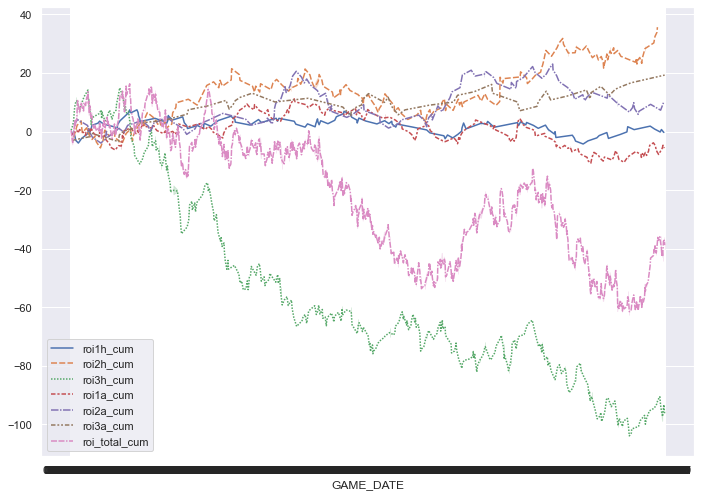

In [102]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data_roi )

In [85]:
data_roi.to_csv('pred_data_nn_old_data.csv')